<a href="https://colab.research.google.com/github/hongqin/Generative_AI_Fa25/blob/main/RL_learning_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chatgpt.com/share/686c22c6-9348-800c-89e2-b2e3220cc5fc

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


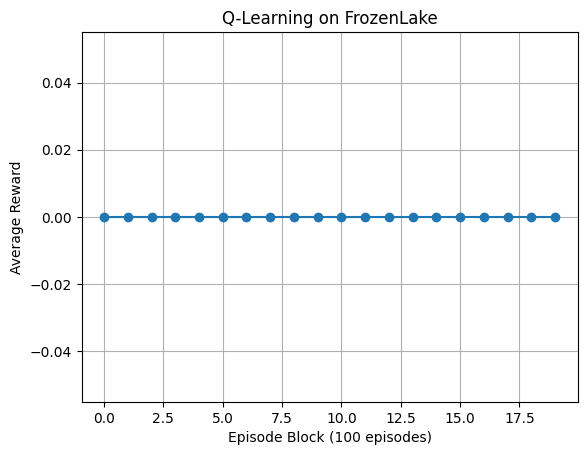

Learned Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
# chatGPT drafted, runs but seems to have no learning  20250707

# Q-Learning on FrozenLake with Gym 0.26.2 (Colab-ready)


# Install a compatible Gym version
!pip install gym==0.26.2 > /dev/null

import numpy as np

# Patch numpy for Gym compatibility (numpy.bool8 removal fix)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

import gym
import random
import matplotlib.pyplot as plt

# Create FrozenLake environment (deterministic transitions)
env = gym.make('FrozenLake-v1', is_slippery=False)

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8       # Learning rate
gamma = 0.95      # Discount factor
epsilon = 0.1     # Exploration rate
episodes = 2000   # Number of training episodes
max_steps = 100   # Max steps per episode

# Store total rewards per episode
rewards = []

for ep in range(episodes):
    state = env.reset()      # Initial state
    total_reward = 0

    for _ in range(max_steps):
        # ε-greedy action selection
        if random.random() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])        # Exploit

        new_state, reward, done, info = env.step(action)

        # Q-learning update: Q[s,a] += α*(r + γ*max_a'Q[s',a'] − Q[s,a])
        best_next = np.max(Q[new_state])
        Q[state, action] += alpha * (reward + gamma * best_next - Q[state, action])

        state = new_state
        total_reward += reward

        if done:
            break

    rewards.append(total_reward)

# Compute average reward per 100-episode block
blocks = np.split(np.array(rewards), episodes / 100)
avg_rewards = [blk.mean() for blk in blocks]

# Plot learning curve
plt.plot(avg_rewards, marker='o')
plt.xlabel('Episode Block (100 episodes)')
plt.ylabel('Average Reward')
plt.title('Q-Learning on FrozenLake')
plt.grid(True)
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)


Here’s a second classic—and very simple—RL example, with no external libraries beyond NumPy and Matplotlib:

Problem

A “random-walk” MDP with six states: two terminal end-points (left=0, right=5) and four non-terminals (1–4).

You start in state 3 and at each step move left or right with equal probability.

You get a reward of 1 only if you end up on the right terminal; otherwise 0.

Objective

Use TD(0) (one-step temporal-difference) to learn the value function
𝑉
(
𝑠
)
V(s) for the non-terminal states under the random policy.

Key Points

You see only immediate reward and the next state’s estimate; no model of the dynamics is used.

Over episodes, your estimates converge toward the known true values (here
𝑖
/
5
i/5 for state
𝑖
i).

Results

The first plot shows your final estimates almost matching the true linear ramp.

The second plot shows the mean-squared error falling as learning progresses.

This random-walk example cleanly illustrates:

Bootstrapping: updating based on existing estimates.

Sampling: learning from single trajectories.

Online learning: updates happen step by step, episode by episode.

Feel free to experiment by changing:

α (learning rate) and γ (discount factor)

Starting state or number of episodes

The policy (biased moves or ε-greedy variations)

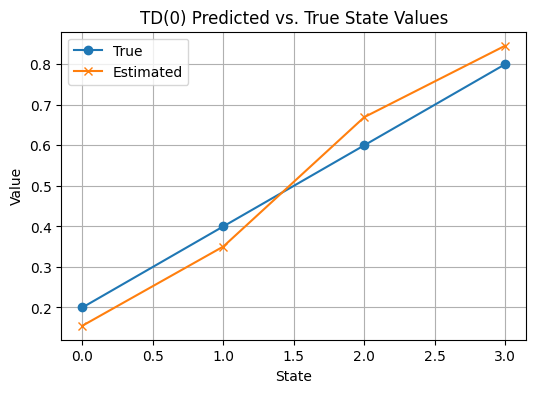

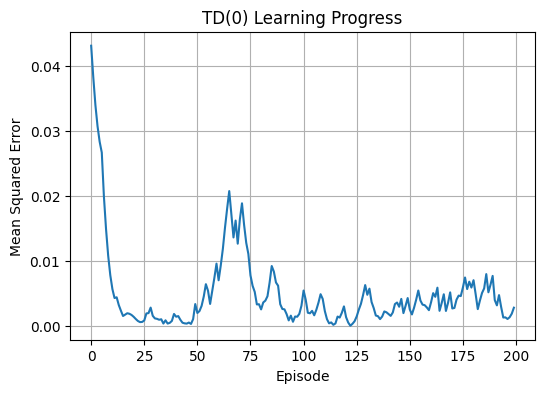

Final value estimates (states 1–4): [0.155 0.35  0.669 0.846]


In [5]:
# try again to fix the non-learning problem

# 5‑State Random Walk: TD(0) Value Prediction Example

# This Colab-ready snippet implements the classic random-walk MDP from Sutton & Barto,
# using TD(0) to estimate state values. No external RL libraries needed.

import numpy as np
import matplotlib.pyplot as plt

# --- Environment Setup ---
# States: 0 (terminal left), 1, 2, 3, 4, 5 (terminal right)
num_states = 6
terminal_left = 0
terminal_right = num_states - 1
start_state = 3

# True values for non‑terminal states: i/(N-1)
true_values = np.arange(num_states) / (num_states - 1)

# --- Algorithm Parameters ---
alpha = 0.1      # Learning rate
gamma = 1.0      # No discounting in episodic tasks
n_episodes = 200  # Number of episodes to run

# Initialize value estimates (V) arbitrarily for non‑terminal states
V = np.zeros(num_states)
V[1:-1] = 0.5

# Track Mean Squared Error over time
mse_track = []

# --- TD(0) Learning ---
for ep in range(n_episodes):
    state = start_state
    while state not in (terminal_left, terminal_right):
        # Step: move left or right with equal probability
        if np.random.rand() < 0.5:
            next_state = state - 1
        else:
            next_state = state + 1

        # Reward: 1 on reaching right terminal, 0 otherwise
        reward = 1 if next_state == terminal_right else 0

        # TD update for current state
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state

    # Compute MSE against true values (only non‑terminal states)
    mse = np.mean((V[1:-1] - true_values[1:-1])**2)
    mse_track.append(mse)

# --- Visualization ---

# 1) Value estimates vs. True values
plt.figure(figsize=(6,4))
plt.plot(true_values[1:-1], marker='o', label='True')
plt.plot(V[1:-1], marker='x', label='Estimated')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('TD(0) Predicted vs. True State Values')
plt.legend()
plt.grid(True)
plt.show()

# 2) Learning curve (MSE over episodes)
plt.figure(figsize=(6,4))
plt.plot(mse_track)
plt.xlabel('Episode')
plt.ylabel('Mean Squared Error')
plt.title('TD(0) Learning Progress')
plt.grid(True)
plt.show()

# Print final estimates
print("Final value estimates (states 1–4):", np.round(V[1:-1], 3))


Policy example

Introduction
Policy‐gradient methods directly adjust the parameters of a stochastic policy to maximize expected return. Unlike value-based approaches (which learn action-value or state-value functions), policy gradients:

Parameterize a policy
𝜋
𝜃
(
𝑎
)
π
θ
​
 (a) (e.g. via a softmax over preferences).

Sample actions according to
𝜋
𝜃
π
θ
​
 , observe rewards.

Estimate the gradient of the expected return w.r.t.
𝜃
θ using Monte Carlo samples.

Update
𝜃
θ in the direction of higher‐return actions.

In this minimal example, our “environment” is a two-armed bandit with unknown success probabilities
[
0.2
,
0.8
]
[0.2,0.8]. Each time step is one pull (no multi-step episodes), and the reward is 1 if the chosen arm succeeds, 0 otherwise. We apply the REINFORCE update:

𝜃

←

𝜃

+

𝛼

𝑟

∇
𝜃
log
⁡
𝜋
𝜃
(
𝑎
)
.
θ←θ+αr∇
θ
​
 logπ
θ
​
 (a).
Over many pulls, the policy learns to favor the better arm.



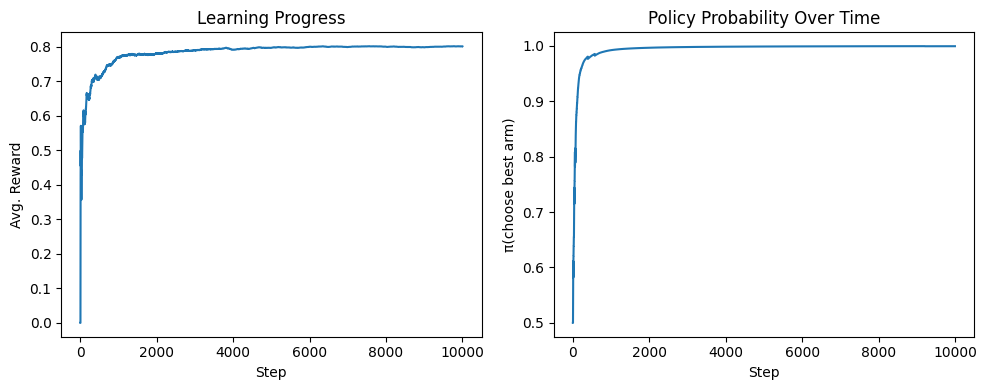

True best-arm probability: 0.8
Learned probability of choosing arm 1: 0.9992379548026384


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Two-Armed Bandit with REINFORCE Policy Gradient ---

# True reward probabilities for the two arms
true_probs = [0.2, 0.8]

# Initialize policy parameters (preferences)
theta = np.zeros(len(true_probs))

# Learning settings
alpha = 0.1         # step size
n_steps = 10000     # total pulls
rewards = []        # record reward (0 or 1) each step
policy_history = [] # record policy probabilities over time

for step in range(n_steps):
    # 1) Compute action probabilities via softmax
    exp_theta = np.exp(theta)
    probs = exp_theta / np.sum(exp_theta)

    # Record current policy
    policy_history.append(probs.copy())

    # 2) Sample action under current policy
    action = np.random.choice(len(true_probs), p=probs)

    # 3) Pull arm and observe reward
    reward = 1 if np.random.rand() < true_probs[action] else 0
    rewards.append(reward)

    # 4) Compute gradient of log π(a|θ): ∇θ log π = one-hot(a) − π
    grad_log = -probs
    grad_log[action] += 1

    # 5) Policy parameter update: θ ← θ + α * reward * ∇θ log π
    theta += alpha * reward * grad_log

# Convert history to array for plotting
policy_history = np.array(policy_history)
cumulative_avg = np.cumsum(rewards) / (np.arange(n_steps) + 1)

# --- Plots ---
plt.figure(figsize=(10,4))

# Plot cumulative average reward
plt.subplot(1, 2, 1)
plt.plot(cumulative_avg)
plt.xlabel('Step')
plt.ylabel('Avg. Reward')
plt.title('Learning Progress')

# Plot evolving policy probability for arm 1
plt.subplot(1, 2, 2)
plt.plot(policy_history[:,1])
plt.xlabel('Step')
plt.ylabel('π(choose best arm)')
plt.title('Policy Probability Over Time')

plt.tight_layout()
plt.show()

# Final learned policy
final_probs = np.exp(theta) / np.sum(np.exp(theta))
print("True best-arm probability:", true_probs[1])
print("Learned probability of choosing arm 1:", final_probs[1])
